# 线性回归

【关键词】一元一次线性回归；一元多次线性回归；自定义类；多元线性回归

# 一元线性回归

### 1. 案例背景

通常来说，收入都会随着工作年限的增长而增长，而在不同的行业中收入的增长速度都会有所不同，本项目就是来通过一元线性回归模型来探寻工作年限对收入的影响，也即搭建收入预测模型，同时比较多个行业的收入预测模型来分析各个行业的特点。

### 2. 一元一次线性回归模型

In [1]:
# 数据读取
import pandas as pd
df = pd.read_excel('IT行业收入表.xlsx')
df.head()

,工龄,薪水
0,0.0,10808
1,0.1,13611
2,0.2,12306
3,0.3,12151
4,0.3,13057


In [2]:
# 工龄为自变量，薪水为因变量
X = df[['工龄']]
Y = df['薪水']

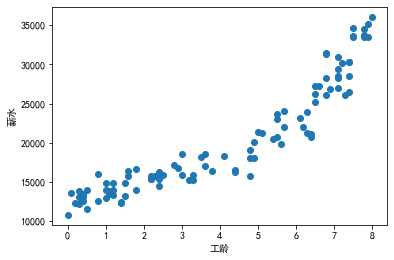

In [3]:
# 绘制自变量与因变量的散点图
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.scatter(X,Y)
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

In [4]:
# 模型搭建
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,Y)  # 训练模型

LinearRegression()

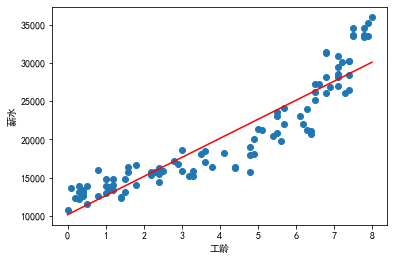

In [5]:
# 模型可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X), color='red')  # color='red'设置为红色
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

In [6]:
# 回归方程
print('系数a为:' + str(regr.coef_[0]))
print('截距b为:' + str(regr.intercept_))

系数a为:2497.1513476046866
截距b为:10143.131966873787


得出的一元线性回归曲线方程为：y = 2497*x + 10143

In [7]:
# 根据给定自变量进行预测
pred = regr.predict([[4.5], [ 5.1]])
pred

d:\1_Software\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21380.31303109, 22878.60383966])

### 3. 模型优化：一元多次线性回归模型

从一元一次方程的拟合结果来看，直线对于数据点的拟合效果并不是很好。从散点图的分布来看，对于数据的分布情况而言，使用曲线拟合更合适。因此，此次优化使用一元二次线性回归模型，即：
**y = a*x^2 + b*x + c**

In [8]:
# 先生成二次项数据：
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

In [9]:
print(X_[0:5])

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]
 [1.   0.3  0.09]]


In [10]:
# 模型训练：将含有二次项的数据利用线性回归进行拟合
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression()

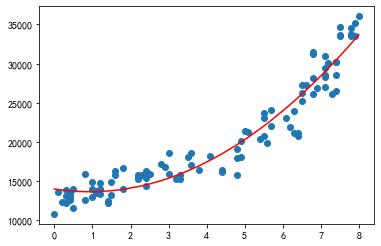

In [11]:
# 可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X_), color='red')
plt.show()

In [12]:
# 打印系数和常数项
print(regr.coef_)  # 获取系数a, b 
print(regr.intercept_)  # 获取常数项c

[   0.         -743.68080444  400.80398224]
13988.159332096884


此时的系数项中为3个数，第一个0对应之前生成的X_常数项前面的系数，也对应之前说的X_的常数项不会产生影响；-743.68代表的X_一次项前面的系数，也即系数b；400.8代表的X_二次项前面的系数，也即系数a；而13988则代表常数项c，所以该一元二次线性回归方程为：
**y = 400.8*x^2 - 743.68*x + 13988**

### 4. 模型评估

In [13]:
# 评估一元一次线性回归模型
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.5
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           6.69e-43
Time:                        17:39:03   Log-Likelihood:                -930.83
No. Observations:                 100   AIC:                             1866.
Df Residuals:                      98   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    507.633     19.981      0.000    9135.751    1.12e+04
工龄          2497.1513    103.823     24.052      0.000    2291.118    2703.185
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.463
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.667   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# 评估一元二次线性回归模型
X3 = sm.add_constant(X_)
est = sm.OLS(Y, X3).fit()
est.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     654.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           4.70e-57
Time:                        17:39:03   Log-Likelihood:                -893.72
No. Observations:                 100   AIC:                             1793.
Df Residuals:                      97   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+04    512.264     27.307      0.000     1.3e+04     1.5e+04
x1          -743.6808    321.809     -2.311      0.023   -1382.383    -104.979
x2           400.8040     38.790     10.333      0.000     323.816     477.792
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.083
Skew:                          -0.352   Prob(JB):                        0.353
Kurtosis:                       3.063   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

从R值来看，一元二次线性回归比一次线性回归拟合效果要好。  
以上代码参考：https://edu.huaxiaozhi.com/download

### 5. 行业对比

In [15]:
# 读入各行业数据
csi = pd.read_excel('./餐饮服务行业收入表.xlsx')
fin = pd.read_excel('./金融行业收入表.xlsx')
motor = pd.read_excel('./汽车制造行业收入表.xlsx')
it = pd.read_excel('./IT行业收入表.xlsx')

# 数据来源：https://edu.huaxiaozhi.com/download

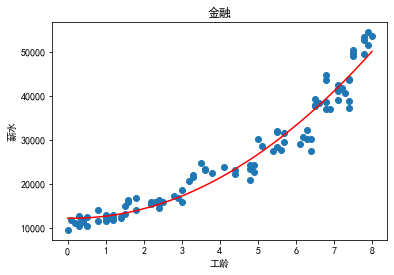

In [16]:
# 自定义类
class LinearReg:

    '''参数说明：
       data:dataframe格式数据表
       title:图表标题名称
       type:最高次项，如一元一次方程拟合则type为1，默认为1
    '''

    def __init__(self, data, title):
        self.data = data
        self.title = title
        self.X = data[['工龄']]
        self.y = data['薪水']

    def scatter(self):
        '''绘制带标题的散点图'''
        plt.scatter(self.X, self.y)
        plt.xlabel('工龄')
        plt.ylabel('薪水')
        plt.title(self.title)

    def model_fit(self, type=1):
        '''模型拟合'''
        model = LinearRegression()
        X_ = [self.X if type == 1 else PolynomialFeatures(degree=type).fit_transform(self.X)][0] # 直接取出值而非列表
        model.fit(X_,self.y)
        return [model.predict(X_), X_, model.coef_, model.intercept_] # 返回模型预测值、系数和截距项列表；eg:MultiLinearReg(fin, '金融').model_fit(2)[1]

    def plot(self, type=1):
        '''绘制模型拟合后的图像'''
        self.scatter()
        plt.plot(self.X, self.model_fit(type)[0], color='red')

    def model_evaluation(self, type=1):
        X_fit = sm.add_constant(self.model_fit(type)[1])
        evaluation = sm.OLS(self.y, X_fit).fit()
        print(evaluation.summary())        

LinearReg(fin, '金融').plot(2) #示例

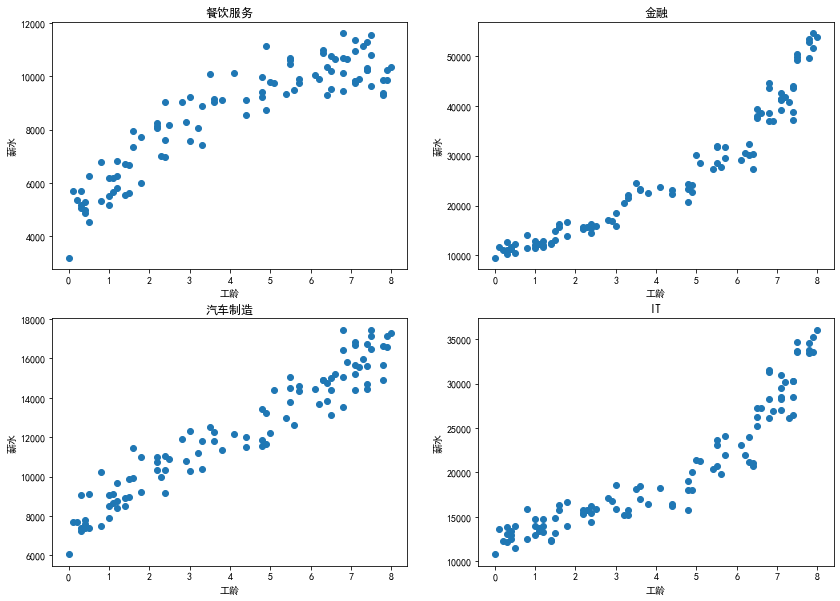

In [17]:
# 数据准备
datas = [csi, fin, motor, it]
titles = ['餐饮服务','金融','汽车制造','IT']

plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    LinearReg(datas[i], titles[i]).scatter()


观察得到，“餐饮服务”、“金融”和“IT”更适合用一元二次函数进行拟合，而“汽车制造”则更适合用一元一次函数进行模拟。

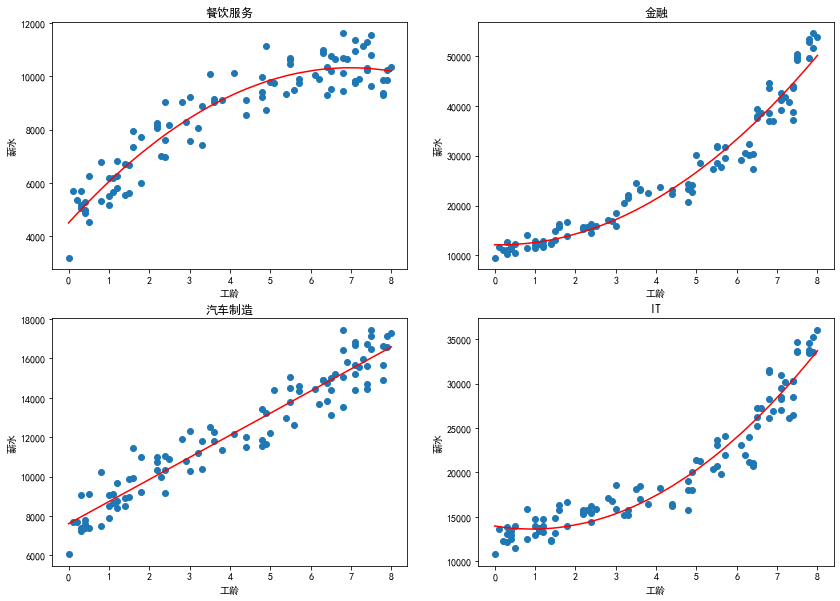

In [18]:
# 拟合类型列表
types = [2,2,1,2]

# 绘制拟合结果
plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    LinearReg(datas[i], titles[i]).plot(types[i])

从此次数据看，金融业和IT业在工龄更长时薪资增长幅度更大。

# 多元线性回归

### 1. 案例背景

这里以信用卡客户的客户价值来解释下客户价值预测的具体含义：客户价值预测就是指客户未来一段时间能带来多少利润，其利润的来源可能来自于信用卡的年费、取现手续费、分期手续费、境外交易手续费用等。而分析出客户的价值后，在进行营销、电话接听、催收、产品咨询等各项服务时，就可以针对高价值的客户进行区别于普通客户的服务，有助于进一步挖掘这些高价值客户的价值，并提高这些高价值客户的忠诚度。

### 2. 多元线性回归

In [19]:
# 读取数据
import pandas as pd
df = pd.read_excel('客户价值数据表.xlsx')
df.head()  # 显示前5行数据

,客户价值,历史贷款金额,贷款次数,学历,月收入,性别
0,1150,6488,2,2,9567,1
1,1157,5194,4,2,10767,0
2,1163,7066,3,2,9317,0
3,983,3550,3,2,10517,0
4,1205,7847,3,3,11267,1


In [20]:
# 获取变量
X = df[['历史贷款金额', '贷款次数', '学历', '月收入', '性别']]
Y = df['客户价值']

In [21]:
# 构建模型
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [22]:
# 打印参数
print('各系数为:' + str(regr.coef_))
print('常数项系数k0为:' + str(regr.intercept_))

各系数为:[5.71421731e-02 9.61723492e+01 1.13452022e+02 5.61326459e-02
 1.97874093e+00]
常数项系数k0为:-208.4200407997355


In [23]:
# 模型评估
import statsmodels.api as sm  # 引入线性回归模型评估相关库
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   客户价值   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     32.44
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           6.41e-21
Time:                        17:39:08   Log-Likelihood:                -843.50
No. Observations:                 128   AIC:                             1699.
Df Residuals:                     122   BIC:                             1716.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.4200    163.810     -1.272      0.206    -532.699     115.859
历史贷款金额         0.0571      0.010      5.945      0.000       0.038       0.076
贷款次数          96.1723     25.962      3.704      0.000      44.778     147.567
学历           113.4520     37.909      2.993      0.003      38.406     188.498
月收入            0.0561      0.019      2.941      0.004       0.018       0.094
性别             1.9787     32.286      0.061      0.951     -61.934      65.891
==============================================================================
Omnibus:                        1.597   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.538
Skew:                           0.264   Prob(JB):                        0.464
Kurtosis:                       2.900   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""